In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

%matplotlib inline

# Bayesian Inference 1 -- the principles

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gem-epidemics/practical-epidemics/blob/master/site/source/iddinf/06-bayesian-inference-1.ipynb)

## Learning outcomes

1. Understand the fundamentals of Bayes' Theorem and how we can use it for inferential purposes;
2. Be able to solve a simple discrete Bayesian problem;
3. Understand the concept of a conditional posterior distribution;
4. Be able to code a simple Gibbs Sampler in Python.

## References

1. Bayes, Thomas & Price, Richard (1763). "An Essay towards solving a Problem in the Doctrine of Chance. By the late Rev. Mr. Bayes, communicated by Mr. Price, in a letter to John Canton, A.M.F.R.S." Philosophical Transactions of the Royal Society of London. 53: 370–418. [doi:10.1098/rstl.1763.0053](https://doi.org/10.1098/rstl.1763.0053).

2. Gelman _et al._ Bayesian Data Analysis, Third Edition.  CRC Press. 2014.

## Introduction
Did you cross a street this morning?  If so, how did you do it?  Did you walk straight out into the traffic, or did you look right, left, and right again?  What did you expect to happen, and what was your experience crossing the street?

Our everyday lives are a learning process, where we continually refine our _a priori_ beliefs about how the world works according to our experiences.  If you successfully crossed the street, and felt safe doing it, then you'll be more likely to continue to regard crossing the street as safe.  If you nearly got run over by a bus, you might think twice about the safety of crossing the street tomorrow morning.

Bayes' Theorem is attributed to the Reverend Thomas Bayes, who was working on how to invert conditional probability.  For example, suppose we wish to verify that a coin is unweighted.  We might have

$$
X \sim \mbox{Bernoulli}(p)
$$

with event space $X \in \{H, T\}$ for heads and tails respectively.  We can write

$$
Pr(X = \mbox{Head} | \theta ) = \theta
$$

and

$$
Pr(X = \mbox{Tail} | \theta) = 1 - \theta
$$

### Question

If we know $Pr(X | \theta)$, is it possible to know $Pr(\theta | X)$?  i.e. can we work out the _a posteriori_ probability distribution of $\theta$ given that we have observed some outcome $X$?

### Answer

Thomas Bayes discovered that this is indeed possible, using a formula now known as _Bayes' Theorem_:

$$
\color{red}{Pr(\theta | X)} = \frac{Pr(X | \theta)\color{blue}{Pr(\theta)}}{\color{green}{Pr(X)}}.
$$

In Bayesian statistics, we recognise the following quantities:

<dl>
<dt>Likelihood</dt>
<dd>The probability of observing data $X$ given a probability model (i.e. probability law) $Pr(X|\theta)$.</dd>

<dt><font color="blue">Prior distribution</font></dt>
<dd>The <i>a priori</i> probability distribution $Pr(\theta)$ of parameter $\theta$ <i>before</i> having observed data $X$.</dd>

<dt><font color="green">Model evidence (or marginal likelihood)</font></dt>
<dd>The probability of observing the data "averaged out" over all values of the
parameter.</dd>

<dt><font color="red">Posterior distribution</font></dt>
<dd>The probability distribution $Pr(\theta | X)$ having observed the data $X$ <i>a posteriori</i>.</dd>

</dl>

### Model evidence

The model evidence

$$
Pr(X) = \int_{\Theta} Pr(X | \theta) Pr(\theta) d\theta
$$
if $\theta$ is continuous, or

$$
Pr(X) = \sum_{\Theta} Pr(X | \theta) Pr(\theta)
$$

if $\theta$ is discrete, is a vexing quantity!  We can think of it as the "normalising constant" that ensures the posterior distribution $P(\theta | X)$ sums up to 1 over all values of the parameter $\theta$ in order to satisfy the axioms of probability.  

It is this integral (or sum) that often makes life difficult in Bayesian statistics, requiring the use of complex algorithms such as MCMC or SMC.

## Example

In diagnostic testing, we often know the sensitivity and specificity of a test, which is essentially the probability of a test outcome _given_ the disease status of the patient.  i.e.

$$
\mbox{Sensitivity}:\;\; Se = Pr(T^+ | D^+)
$$

and

$$
\mbox{Specificity}:\;\; Sp = Pr(T^- | D^-).
$$

However, if we are a clinician, we really want to know the disease status of a patient _given_ the test result, i.e. $Pr(D | T)$, where

$$
\mbox{Positive predictive value}:\;\; PPV = Pr(D^+ | T^+)
$$

and

$$
\mbox{Negative predictive value}:\;\; NPV = Pr(D^- | T^-)
$$

How can we work out the predictive values given the sensitivity and specificity?

Bayes' Theorem tells us that

$$
Pr(D | T) = \frac{Pr(T | D)Pr(D)}{\sum_{D}Pr(T|D)Pr(D)dD}.
$$

where the prior distribution $Pr(D)$, the probability that the patient has the disease before observing the test result, is essentially the true prevalence of the disease in the population (modulo random sampling assumptions, etc).

__Conclusion__: Bayes' Theorem shows us that the predictive values of a diagnostic test are _inextricably_ linked to both the test characteristics _and_ the prevalence of disease in the population.


### Exercise 1

A diagnostic test has 80% sensitivity and 99% specificity.  Given a disease prevalence of 0.5%, compute the probability that a patient selected at random and who tests positive has the disease.

### Exercise 2

For the same diagnostic test, compute the probability that a patient _does not_ have the disease given they test negative.

#### Solutions

__Exercise 1__

Let sensitivity $Se = 0.8$, specificity $Sp = 0.99$, and prevalence $p = 0.005$.
 Then, From Bayes' Theorem,

$$
\begin{align}
Pr(D^+ | T^+) & = \frac{Pr(T^+ | D^+) Pr(D^+)}{Pr(T^+ | D^+)Pr(D^+) + Pr(T^+ | D^-)Pr(D^-)} \\
& = \frac{Se \times p}{Se \times p + (1 - Sp)(1-p)} \\
& = \frac{0.8 \times 0.005}{0.8 \times 0.005 + (1 - 0.99)(1 - 0.005)} \\
& = 0.287
\end{align}
$$

__Exercise 2__

Again, from Bayes' Theorem

$$
\begin{align}
Pr(D^- | T^-) & = \frac{Pr(T^- | D^-) Pr(D^-)}{Pr(T^- | D^-)Pr(D^-) + Pr(T^- | D^+)Pr(D^+)} \\
& = \frac{Sp(1 - p)}{Sp(1-p) + (1-Se)p} \\
& = \frac{0.99 (1 - 0.005)}{0.99(1-0.005) + (1 - 0.8)0.005} \\
& = 0.999
\end{align}
$$

## Priors, Likelihoods, and Posteriors

We've studied likelihoods in the previous two sessions, but how do we sensibly choose a prior distribution?

Prior distributions should encode our _honest_ belief about a parameter of interest in advance of observing the data, bearing in mind the following:

1. The _support_ of the prior distribution should match the expected values that a parameter in the likelihood could take.  For example, $p \sim \mbox{Beta}(a, b),\; 0 \leq p \leq 1$ would work for a probability parameter $p$, and $\gamma \sim \mbox{Gamma}(\nu, \lambda),\; \gamma > 0$ would work well for the transmission parameters in an epidemic model.

2. We should be _honest_ about our beliefs about a parameter.  For example, do we _really_ believe that a probability parameter could take the value 0 (e.g. heads are impossible) or 1 (e.g. tails are impossible)?

### Example

Suppose we are interested in estimating the probability that a coin comes up heads.  We have a likelihood

\begin{align}
Pr(H | p) & = p \\
Pr(Y | p) & = (1 - p)
\end{align}

Since $0 \leq p \leq 1$, a Beta distribution might be a sensible prior distribution to use.  For example

Text(0.5, 1.0, 'Beta distribution for a=2, b=2')

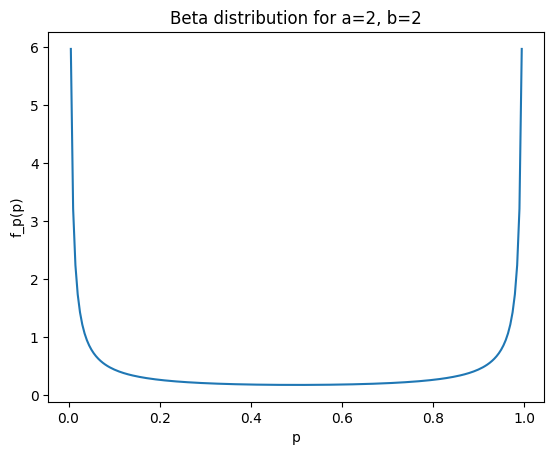

In [2]:
p = np.linspace(0, 1, 200)
y = sp.stats.beta.pdf(p, a=0.1, b=0.1)

plt.plot(p, y)
plt.xlabel("p")
plt.ylabel("f_p(p)")
plt.title("Beta distribution for a=2, b=2")

### Exercise 3

Plot Beta distributions for $(a,b) = (1, 1), (0.1, 0.1), (0.1, 2), (1, 0.1)$ and any other values you wish to explore such that $a,b > 0$.  How can you adjust the parameters of this distribution to encode different beliefs about the parameter of interest?

Does $(a, b) = (1,1)$ make sense as a prior?  What is it equivalent to?

### The posterior distribution

For the sake of clarity, we will refer to the posterior distribution as $\pi(p | X)$, the likelihood function as $L(X | p)$, and our prior distribution as $f(p)$.  

Suppose we observe the sequence of coin tosses $\{H, T, H, H, T\}$.  Let's choose a head to represent "success", and combine our $n=5$ Bernoulli coin tosses into a Binomial random variable.  This gives us a likelihood

$$
L(x | p) \propto {n \choose x} p^{x}(1-p)^{n-x}
$$

with the prior distribution

$$
f_(p) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1}
$$

Our posterior distribution is then given by substituting the prior and likelihood into Bayes' Theorem

$$
L(x | p) = \frac{{n \choose x} p^{x}(1-p)^{n-x} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1}}{\int_0^1 {n \choose x} p^{x}(1-p)^{n-x} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1} dp}
$$

Ugh!  That's _horrendous_!  Fortunately, someone has done the maths for us, such that we know the distribution of $p$:

$$
p | x \sim \mbox{Beta}(a + x, b + n - x)
$$

a Beta distribution with parameters $a^\prime = a + x$ and $b^\prime = b + n - x$.

Let's draw a graph of the prior (with $a=2, \; b=2$), likelihood, and posterior distributions superimposed...

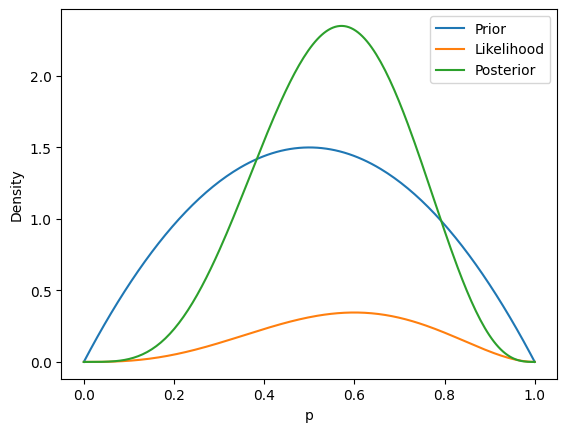

In [3]:
p = np.linspace(0, 1, 200)

prior = sp.stats.beta.pdf(p, a=2, b=2)
likelihood = sp.stats.binom.pmf(k=3, n=5, p=p)
posterior = sp.stats.beta.pdf(p, a=2 + 3, b=2 + 5 - 3)

plt.plot(p, prior, label="Prior")
plt.plot(p, likelihood, label="Likelihood")
plt.plot(p, posterior, label="Posterior")

plt.legend()
plt.xlabel("p")
_ = plt.ylabel("Density")

1. We can see that the posterior distribution has moved away from the prior distribution, and is narrower with a higher maximum.  This indicates that we have learned something from the data over and above our _a priori_ belief about $p$.

2. From Maximum Likelihood Estimation, we would have concluded $\hat{p} = 3/5 = 0.6$, but the Maximum A-Posteriori (MAP) estimate is slightly less than 0.6.  This represents a compromise between the mode of the prior (0.5) and the (data-only) MLE.  

### Exercise 4

1.  Plot the graph above for different values of the prior parameters $a$ and $b$.  What do you notice about the posterior in relation to your likelihood?

2.  Reset $a=b=2$, and instead vary the number of coin tosses and number of heads (i.e. "successes") achieved.  What do you notice about how the posterior behaves in relation to the prior?

## Prior conjugacy

You may be wondering how we concluded that our posterior distribution in the coin tossing experiment above was Beta-distributed.  It turns out that for a Binomial likelihood with Beta prior, we know that the posterior distribution is _also_ Beta-distributed!  

Let's go back to the horrible expression for the posterior above

$$
\pi(p | x) = \frac{{n \choose x} p^{x}(1-p)^{n-x} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1}}{\int_0^1 {n \choose x} p^{x}(1-p)^{n-x} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1} dp}
$$

Is this expression really that bad?  First of all, remember that the bottom of the fraction is really just $f(x)$

$$
\pi(p | x) = \frac{{n \choose x} p^{x}(1-p)^{n-x} \cdot \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} p^{a-1}(1-p)^{b-1}}{f(x)}
$$

and that any multiplicative term _not_ involving $p$ just serves to stretch the posterior in the y-direction, leaving the position of the mode and the relative heights between points on the posterior curve intact.  Thus, we can write

$$
\pi(p | x) \propto p^{x}(1-p)^{n-x} \cdot p^{a-1}(1-p)^{b-1}
$$

and collecting terms together

$$
\pi(p | x) \propto p^{a + x -1}(1-p)^{b + n - x -1}
$$

which we can recognise as an un-normalised Beta distribution such that

$$
\pi(p | x) = \frac{\Gamma(a^\prime + b^\prime)}{\Gamma(a^\prime)\Gamma(b^\prime)} p^{a^\prime - 1} (1 - p)^{b^\prime - 1}
$$

for $a^\prime = a + x$ and $b^\prime = b + n - x$.

It turns out that there are a bunch of prior/likelihood combinations that have the conjugacy property, and a useful reference table is the [Wikipedia page on Conjugate priors](https://wikipedia.org/wiki/Conjugate_prior).


## Posteriors with more than one parameter

What happens when we have a likelihood function that takes more than one parameter?  For example, suppose we have Normally-distributed observations, such that

$$
y_i \overset{iid}{\sim} \mbox{Normal}(\mu, \sigma^2).
$$

As previously, we can construct a likelihood function as a product over Normal pdf terms since our data is independent:

$$
L(\mathbf{y} | \mu, \sigma) \propto \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

If we assume that our priors are independent, the _joint_ posterior for this model is simply

$$
\pi(\mu, \sigma | \mathbf{y}) = \frac{L(\mathbf{y} | \mu, \sigma)f_\mu(\mu)f_\sigma(\sigma)}{f(\mathbf{y})}
$$

i.e. a product of the likelihood and _both_ independent prior distributions.

### Conditional posteriors

So how do we actually go about computing $\pi(\mu, \sigma | \mathbf{y})$?  Remember that from the point of view of $\mu$ and $\sigma$, $f(\mathbf{y})$ is just a multiplicative constant.  We can write

\begin{align}
\pi(\mu, \sigma | \mathbf{y}) & \propto L(\mathbf{y} | \mu, \sigma) f_\mu(\mu) f_\sigma(\sigma).
\end{align}

What priors should we choose? It turns out that if we choose a Normal prior for the mean $\mu$, and a Gamma prior for the _inverse_ of the variance $\sigma^2$, we can exploit conjugate priors.  Letting the _precision_ $\tau = 1/\sigma^2$, let's write our model down in the Bayesian way

\begin{align}
\mu & \sim \mbox{Normal}(\mu_0, 1/\tau_0) \\
\tau & \sim \mbox{Gamma}(\nu, \lambda) \\
y_i & \overset{iid}{\sim} \mbox{Normal}(\mu, 1/\tau)
\end{align}

Since these priors are conjugate with respect to the likelihood (see [Wikipedia table](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution)), we know that

$$
\mu | \tau, \mathbf{y} \sim \mbox{Normal}\left(\frac{\tau_0\mu_0 + \tau \sum_{i=1}^{n} y_i}{\tau_0 + n\tau}, (\tau_0 + n\tau)^{-1}\right)
$$

and

$$
\tau | \mu, \mathbf{y} \sim \mbox{Gamma}\left(\nu + \frac{n}{2}, \lambda + \frac{\sum_{i=1}^{n}(y_i - \mu)^2}{2}\right).
$$

__N.B.__ In this example, we are using the _rate_ parameterisation of the Gamma distribution!  Numpy/Scipy uses the _scale_ parameterisation, where _rate_ = 1/_scale_.  

The _conditional posterior distribution_ of a variable $x$ conditional on any other variable(s) $z$ has distribution function $f(x | z)$, and is just the posterior distribution of $x$ considering all other variables $z$ known.

### The Gibbs sampler

The problem with the posterior distributions for $\mu$ and $\tau$ above, is that they are _conditional_ on each other!   That means we cannot readily draw curves representing the probability distribution functions.  To do so, we'd need to "average out" the distribution for $\mu$ over $\tau$, and $\tau$ over $\mu$.

A solution to this problem is to use a Markov-chain Monte Carlo algorithm known as the Gibbs Sampler.  Here, we alternately sample from the _conditional posterior distributions_ $\mu | \tau, \mathbf{y}$ and $\tau | \mu, \mathbf{y}$ according to:

0. Let $k=1$, and pick initial values for $\mu^{(k)}$ and $\tau^{(k)}$ consistent with the support of the respective conditional posterior distributions.
1. Draw $$\mu^{(k+1)} \sim \mbox{Normal}\left(\frac{\tau_0\mu_0 + \tau^{(k)} \sum_{i=1}^{n} y_i}{\tau_0 + n\tau}, (\tau_0 + n\tau)^{-1}\right)$$
2. Draw $$\tau^{(k+1)} \sim \mbox{Gamma}\left(\nu + \frac{n}{2}, \lambda + \frac{\sum_{i=1}^{n}(y_i - \mu^{(k+1)})^2}{2}\right)$$
3. Set $k \leftarrow k + 1$
4. Goto 1 until $k = K$
5. Plot histograms of $\mu^{(1,\dots,K)}$ and $\tau^{(1,\dots,K)}$ to estimate the _marginal_ posterior distribution functions of each parameter.

__Remarks__:

1. Notice that in step 1 we draw $\mu^{(k+1)} | \tau^{(k)}$ but in step 2 we draw $\tau^{(k+1)} | \mu^{(k+1)}$.  That means that each variable is drawn from its conditional posterior distribution given the _previously_ drawn value of the other variable.

2. How big should $K$ be?  Essentially, we need enough draws of each variable to achieve a reasonably smooth histogram, and such that the Monte Carlo error in the estimation of the posterior is minimised.


### Exercise 5

Suppose we choose prior distributions

\begin{align}
\mu & \sim \mbox{Normal}(0.4, 10) \\
\tau & \sim \mbox{Gamma}(0.1, 0.1)
\end{align}

and data-generating model

$$
y_i \sim \mbox{Normal}(\mu, 1/\tau).
$$

For data $y = [0.3, 0.2, 0.8, 0.5, 0.4, 0.4, 0.6]$, implement a Gibbs Sampler using `sp.stats.normal.pdf` and `sp.stats.gamma.pdf` to estimate the marginal posterior distributions $\pi(\mu | \mathbf{y})$ and $\pi(\tau | y)$.

#### Solution

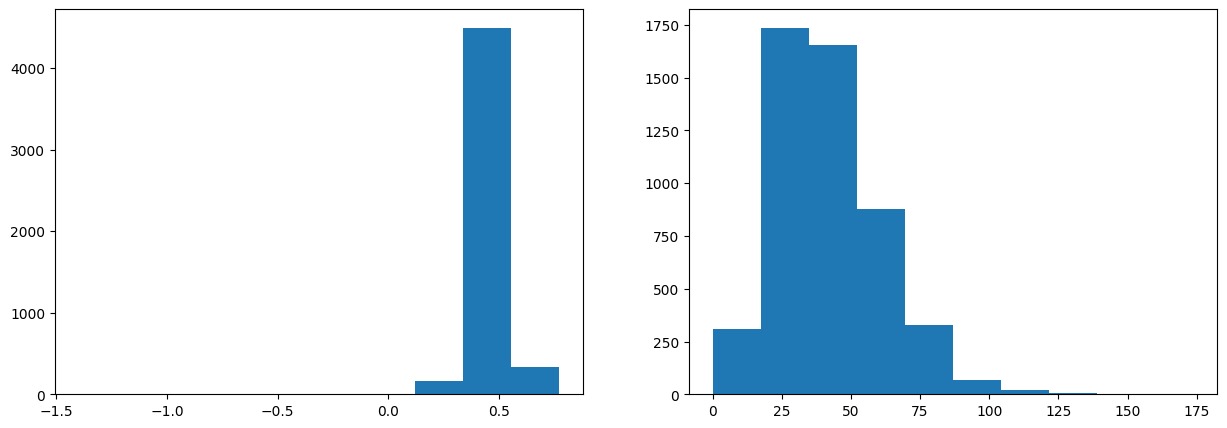

In [4]:
# Data
y = [0.3,0.2,0.8,0.5,0.4,0.4,0.6]

# Conditional posterior samplers
def make_mu_given_tau(y, mu0, tau0):
    def mu_given_tau(tau):
        mean = (tau0 * mu0 + tau * sum(y)) / (tau0 + len(y) * tau)
        prec = tau0 + len(y) * tau

        return sp.stats.norm.rvs(loc=mean, scale=np.sqrt(1/prec))

    return mu_given_tau

def make_tau_given_mu(y, nu, lam):
    def tau_given_mu(mu):
        shape = nu + len(y)/2
        rate = lam + sum((y - mu)**2)/2

        return sp.stats.gamma.rvs(a=shape, scale=1/rate)

    return tau_given_mu

def gibbs_samples(num_samples, y, mu=0.1, tau=0.1):
    """Sample from the posterior of a Normal data model with Normal and Gamma priors"""

    # Posteriors
    mu_given_tau = make_mu_given_tau(y, 0.4, 0.1)
    tau_given_mu = make_tau_given_mu(y, 2.0, 2.0)

    # lists to save samples
    post_mu = [mu]
    post_tau = [tau]

    for k in range(num_samples):
        mu = mu_given_tau(tau)
        tau = tau_given_mu(mu)
        post_mu.append(mu)
        post_tau.append(tau)

    return np.stack(post_mu), np.stack(post_tau)


post_mu, post_tau = gibbs_samples(5000, y)

fig, ax = plt.subplots(1, 2, figsize=[15, 5])
ax[0].hist(post_mu)
_ = ax[1].hist(post_tau)

## Motivation for epidemics

1. __Lack of data__: At the beginning of an epidemic, we don't have much data so priors can help us to still make meaningful predictions;

2. __Prediction__: Because our inference is a probability distribution, Bayesian statistics gives a natural way to predict whilst folding in _parameter uncertainty_;

3. __Censored data__: In practice, we don't observe transition events or epidemic compartments.  Bayesian statistical methods, e.g. Markov chain Monte Carlo (MCMC), Sequential Monte Carlo (SMC), and Approximate Bayesian Computation (ABC), give us the computational machinery to deal with this by treating censored data as parameters to be estimated!  

## Conclusion

In this notebook we have learned:

1. That Bayes' Theorem can be used to reverse conditioning between random variables in a probability model.

2. That the posterior density function is proportional to the prior time the likelihood.

3. That careful choice of priors is required for Bayesian models to make sense.

4. Broadly how to write down Bayesian models as lists of random variables and distributions.

5. Why conjugate priors are important, and how to make inference on the parameter of a uni-dimensional model.

6. How to construct a Gibbs Sampler to sampler from the joint posterior distribution of a two-parameter model using conjugate priors.